In [1]:
import pandas as pd

In [4]:
df=pd.read_csv("/content/house_prices_cleaned_dataset.csv")

In [9]:
df.describe()

,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,BedroomAbvGr,FullBath,GarageCars,SalePrice
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000
mean,10123.100000,6.400000,1973.500000,1031.575000,1667.000000,2.712500,1.700000,2.0,190140.000000
std,2605.988166,1.074968,33.440661,236.529715,349.082607,0.795059,0.483046,0.0,60028.293329
min,6120.000000,5.000000,1915.000000,756.000000,1077.000000,1.125000,1.000000,2.0,118000.000000
25%,8725.000000,5.250000,1947.500000,872.000000,1445.000000,2.250000,1.250000,2.0,140750.000000
50%,9842.000000,7.000000,1984.500000,971.500000,1713.500000,3.000000,2.000000,2.0,190750.000000
75%,11033.000000,7.000000,2000.750000,1135.500000,1783.000000,3.000000,2.000000,2.0,219750.000000
max,14260.000000,8.000000,2004.000000,1530.750000,2198.000000,4.000000,2.000000,2.0,307000.000000


In [10]:
df.head()

,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,BedroomAbvGr,FullBath,GarageCars,SalePrice
0,8450,7,2003,856.0,1710,3.0,2,2,208500
1,9600,6,1976,1262.0,1262,3.0,2,2,181500
2,11250,7,2001,920.0,1786,3.0,2,2,223500
3,9550,7,1915,756.0,1717,3.0,1,2,140000
4,14260,8,2000,1145.0,2198,4.0,2,2,250000


In [11]:
df.tail()

,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,BedroomAbvGr,FullBath,GarageCars,SalePrice
5,14115,5,1993,796.00,1362,1.125,1,2,143000
6,10084,7,2004,1530.75,1694,3.000,2,2,307000
7,10382,7,1973,1107.00,2090,3.000,2,2,200000
8,6120,5,1931,952.00,1774,2.000,2,2,129900
9,7420,5,1939,991.00,1077,2.000,1,2,118000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       10 non-null     int64  
 1   OverallQual   10 non-null     int64  
 2   YearBuilt     10 non-null     int64  
 3   TotalBsmtSF   10 non-null     float64
 4   GrLivArea     10 non-null     int64  
 5   BedroomAbvGr  10 non-null     float64
 6   FullBath      10 non-null     int64  
 7   GarageCars    10 non-null     int64  
 8   SalePrice     10 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 852.0 bytes


In [13]:
df.shape

(10, 9)

In [14]:
(df.isnull().sum() / len(df)) * 100

,0
LotArea,0.0
OverallQual,0.0
YearBuilt,0.0
TotalBsmtSF,0.0
GrLivArea,0.0
BedroomAbvGr,0.0
FullBath,0.0
GarageCars,0.0
SalePrice,0.0


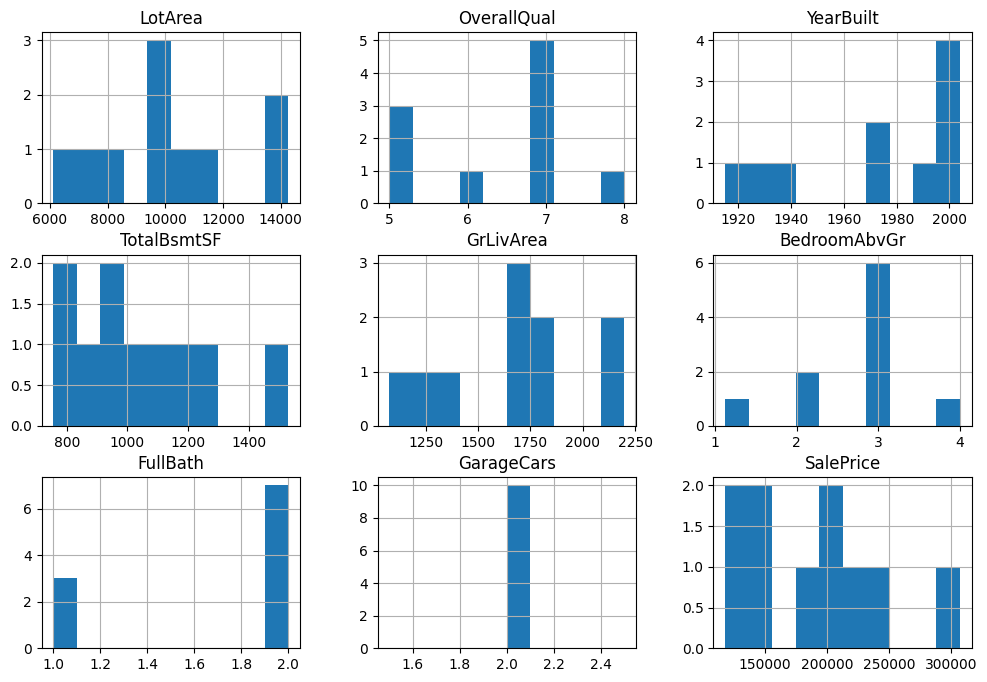

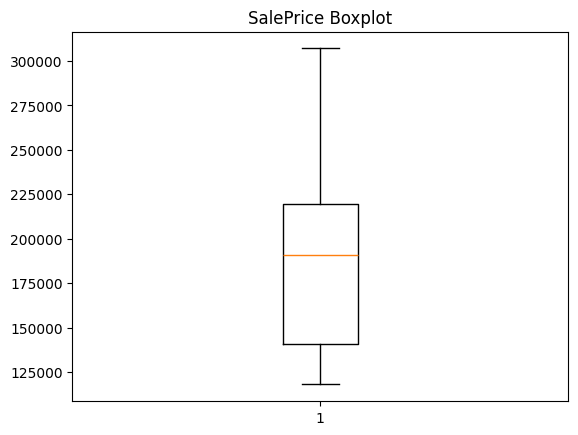

In [15]:
import matplotlib.pyplot as plt

df.hist(figsize=(12,8))
plt.show()

plt.boxplot(df["SalePrice"])
plt.title("SalePrice Boxplot")
plt.show()


In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

In [17]:
df["Outlier_Flag"] = outliers.any(axis=1)


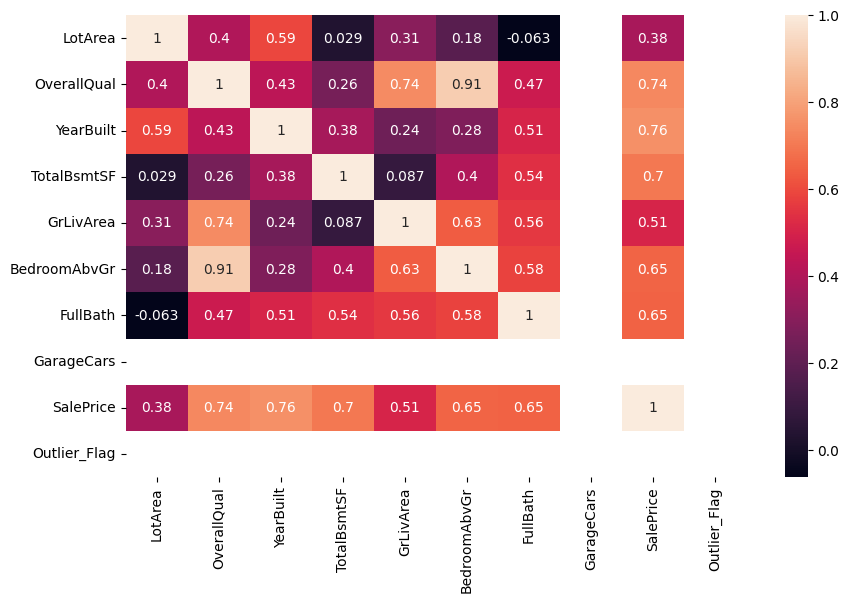

In [19]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [21]:
df_clean = df[~df['Outlier_Flag']]
df_clean.to_csv("house_prices_cleaned_dataset.csv", index=False)